<a href="https://colab.research.google.com/github/Prachi319/Credit-card-fraud-detection-using-Logistic-regression/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#loading the dataset to  a pandas dataframe
credit=pd.read_csv('/content/creditcard.csv')
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
credit.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
11954,20631,1.504204,-0.411728,0.200090,-0.778753,-0.442232,-0.119677,-0.782660,-0.165178,0.691819,...,-0.136231,-0.217274,-0.143260,-1.057332,0.529188,-0.235062,-0.012089,0.000905,9.00,0.0
11955,20636,1.134994,0.096340,0.277921,0.319692,0.742800,1.611803,-0.458649,0.390012,1.424541,...,-0.395605,-0.743542,0.222256,-1.859104,-0.109777,0.279049,0.012398,-0.009090,0.99,0.0
11956,20638,-6.305012,3.944886,-4.707362,1.539602,-3.934785,-1.730565,-2.104936,3.843447,0.863458,...,0.073140,-0.039935,-0.108896,0.691434,-0.261979,-0.447540,0.212900,-0.031021,89.99,0.0
11957,20638,1.161960,-0.398297,1.123732,-0.474237,-1.226667,-0.519325,-0.804179,0.070134,3.262926,...,-0.121191,0.097255,0.050903,0.330479,0.315692,-0.712765,0.073836,0.028055,11.85,0.0
11958,20642,1.291096,-0.226628,0.708386,-0.719236,-0.659099,-0.273757,-0.612042,-0.111488,3.032258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
credit.shape

(11959, 31)

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11959 non-null  int64  
 1   V1      11959 non-null  float64
 2   V2      11959 non-null  float64
 3   V3      11959 non-null  float64
 4   V4      11959 non-null  float64
 5   V5      11959 non-null  float64
 6   V6      11959 non-null  float64
 7   V7      11959 non-null  float64
 8   V8      11959 non-null  float64
 9   V9      11959 non-null  float64
 10  V10     11959 non-null  float64
 11  V11     11959 non-null  float64
 12  V12     11959 non-null  float64
 13  V13     11959 non-null  float64
 14  V14     11959 non-null  float64
 15  V15     11959 non-null  float64
 16  V16     11959 non-null  float64
 17  V17     11959 non-null  float64
 18  V18     11959 non-null  float64
 19  V19     11959 non-null  float64
 20  V20     11958 non-null  float64
 21  V21     11958 non-null  float64
 22

In [6]:
credit.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Handling missing values (imputation)

<Figure size 400x400 with 0 Axes>

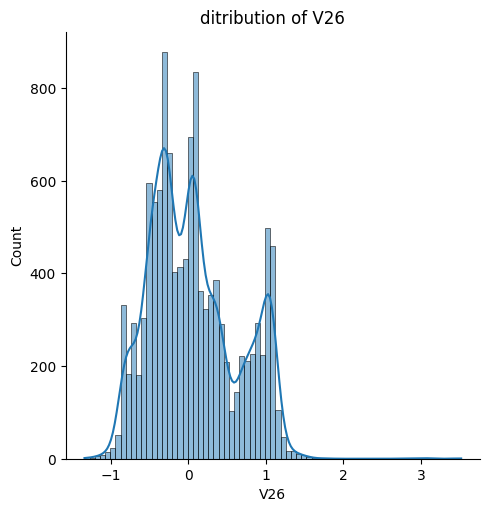

In [7]:
#analyse distribution of data in the v26 col
plt.figure(figsize=(4,4))
sns.displot(credit['V26'],kde=True)
plt.title("ditribution of V26")
plt.show()

Replace the missing value with median vlaue

In [8]:
credit["V26"].fillna(credit["V26"].median(),inplace=True)

<ipython-input-8-add10b1ebdb0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit["V26"].fillna(credit["V26"].median(),inplace=True)


In [9]:
credit["V26"].isnull().sum()

np.int64(0)

<Figure size 700x700 with 0 Axes>

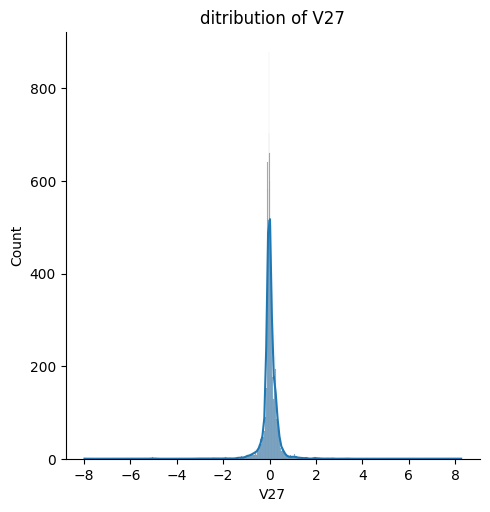

In [10]:
#analyse distribution of data in the v27 col
plt.figure(figsize=(7,7))
sns.displot(credit['V27'],kde=True)
plt.title("ditribution of V27")
plt.show()

Replacing data with mean values

In [11]:
credit["V27"].fillna(credit["V27"].mean(),inplace=True)

<ipython-input-11-e21497595361>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit["V27"].fillna(credit["V27"].mean(),inplace=True)


In [12]:
credit["V27"].isnull().sum()

np.int64(0)

<Figure size 700x700 with 0 Axes>

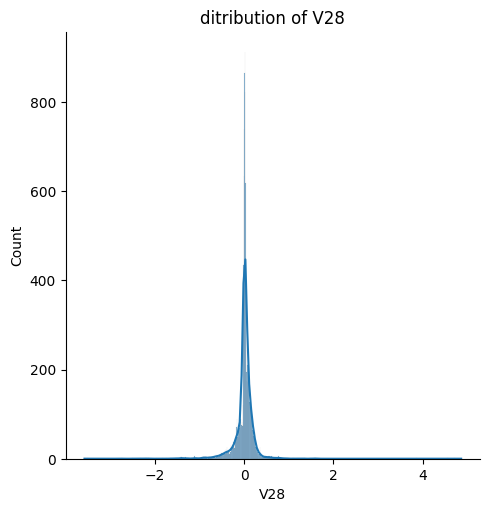

In [13]:
#analyse distribution of data in the v28 col
plt.figure(figsize=(7,7))
sns.displot(credit['V28'],kde=True)
plt.title("ditribution of V28")
plt.show()

In [14]:
credit["V28"].fillna(credit["V28"].mean(),inplace=True)

<ipython-input-14-eaba2b138306>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit["V28"].fillna(credit["V28"].mean(),inplace=True)


In [15]:
credit["V28"].isnull().sum()

np.int64(0)

<Figure size 1000x1000 with 0 Axes>

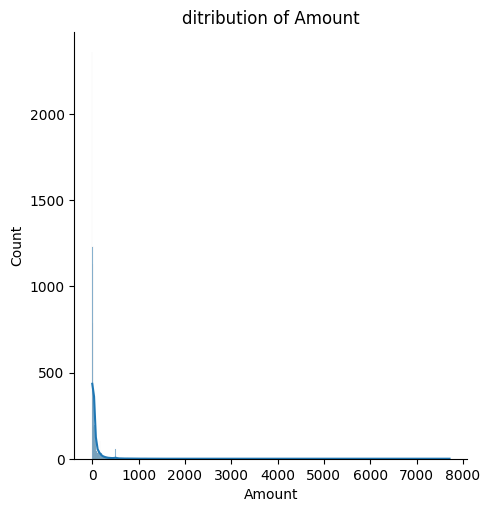

In [16]:
#analyse distribution of data in the Amount col
plt.figure(figsize=(10,10))
sns.displot(credit['Amount'],kde=True)
plt.title("ditribution of Amount")
plt.show()

In [17]:
credit["V28"].fillna(credit["V28"].mode(),inplace=True)

<ipython-input-17-e683881c7196>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit["V28"].fillna(credit["V28"].mode(),inplace=True)


In [18]:
credit["V28"].isnull().sum()

np.int64(0)

In [19]:
credit.dropna(subset=["Class"], inplace=True)


In [20]:
credit["Class"].isnull().sum()

np.int64(0)

0--> legit
1--> fraud

In [21]:
#distribution of legit and fraudulant transaction
credit["Class"].value_counts()

,count
Class,
0.0,11906
1.0,52


This dataset is highly unbalanced

In [31]:
#seperating the data for analysis
legit=credit[credit.Class==0]
fraud=credit[credit.Class==1]

In [32]:
print(legit.shape,fraud.shape)

(11906, 31) (52, 31)


In [33]:
#statistical measure of the data
legit.Amount.describe()

,Amount
count,11906.000000
mean,62.198127
std,177.379105
min,0.000000
25%,5.292500
50%,15.950000
75%,50.000000
max,7712.430000


In [34]:
fraud.Amount.describe()

,Amount
count,52.000000
mean,97.724808
std,321.188775
min,0.000000
25%,1.000000
50%,1.000000
75%,1.772500
max,1809.680000


In [35]:
#compare the vlaues for both transactions
credit.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,7993.389048,-0.200839,0.259753,0.929229,0.255987,-0.076685,0.149326,-0.097364,-0.053087,0.927305,...,0.020836,-0.063076,-0.154427,-0.032369,0.018962,0.105861,0.061825,0.005330,0.000012,62.198127
1.0,11569.615385,-3.769104,4.258027,-8.202329,6.396396,-2.342431,-1.990562,-5.740207,0.950650,-2.729769,...,0.411236,0.305259,-0.021762,-0.340563,-0.406311,-0.139505,0.306967,0.692927,0.059751,97.724808


UNDER-SAMPLING

Build a sample dataset containing similar distribution of normal and fradualent transaction

Number of fradulents transaction=52

In [36]:
#we will take 52 samples of legit data and combine it with similar amount of fraud data to make a dataset
legit_sample=legit.sample(n=52)



Concatinating 2 datframes

In [37]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)

In [38]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10413,16831,1.164481,0.187047,1.385867,1.465545,-0.797311,-0.247172,-0.553406,-0.065697,1.908503,...,-0.163136,-0.043628,0.003078,0.350748,0.389919,-0.455709,0.045580,0.034358,10.21,0.0
3332,2878,-0.800442,0.611450,0.604307,-1.555209,0.210315,0.216749,-0.184932,0.822022,-0.054442,...,-0.065414,-0.370519,-0.088063,-1.141397,-0.220997,0.812693,0.057076,-0.044241,2.31,0.0
367,268,1.146065,0.285853,0.562439,1.459336,-0.225891,-0.346303,0.131988,-0.085179,0.136365,...,-0.071473,0.076177,-0.030567,0.444843,0.650037,-0.335736,0.046372,0.020899,6.54,0.0
2212,1738,-1.496297,-0.408337,-0.430192,-0.531469,-1.534592,-0.219218,2.332650,0.145255,-0.262980,...,0.329289,0.082674,1.150526,0.026200,-0.238297,0.844691,0.001847,0.193013,525.52,0.0
3969,3621,-1.338671,1.080974,1.291196,0.719258,0.101320,0.053896,0.001297,-0.917575,1.638510,...,0.498030,-0.483932,0.037686,0.053566,-0.560078,0.230423,-0.119911,0.321847,27.43,0.0


In [39]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10897,18690,-15.398845,7.472324,-19.026912,11.165526,-6.893856,-2.120937,-14.913330,-0.721214,-7.175097,...,-2.444884,0.727495,-0.345078,-0.981749,0.995271,0.816762,2.262942,-1.178063,1.0,1.0
11343,19762,-14.179165,7.421370,-21.405836,11.927512,-7.974281,-2.202710,-15.471612,-0.356595,-6.380125,...,-2.366836,1.130955,0.991153,-1.033132,-0.327179,0.634693,2.171905,-1.395288,1.0,1.0
11710,20011,-14.724627,7.875157,-21.872317,11.906170,-8.348734,-2.262846,-15.833443,0.077874,-6.356833,...,-2.362345,1.099557,1.037199,-1.036359,-0.254777,0.642343,2.161129,-1.401282,1.0,1.0
11841,20332,-15.271362,8.326581,-22.338591,11.885313,-8.721334,-2.324307,-16.196419,0.512882,-6.333685,...,-2.356896,1.068019,1.085617,-1.039797,-0.182006,0.649921,2.149247,-1.406811,1.0,1.0
11880,20451,-15.819179,8.775997,-22.804686,11.864868,-9.092361,-2.386893,-16.560368,0.948349,-6.310658,...,-2.350634,1.036362,1.136051,-1.043414,-0.108923,0.657437,2.136424,-1.411945,1.0,1.0


In [40]:
new_dataset["Class"].value_counts()

,count
Class,
0.0,52
1.0,52


In [42]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,7986.557692,-0.239720,0.335465,0.998124,0.208273,-0.034890,-0.082977,0.022675,0.017611,1.084912,...,0.023204,-0.110634,-0.133759,-0.084887,0.015198,0.102625,0.017899,0.067530,0.032505,49.385962
1.0,11569.615385,-3.769104,4.258027,-8.202329,6.396396,-2.342431,-1.990562,-5.740207,0.950650,-2.729769,...,0.411236,0.305259,-0.021762,-0.340563,-0.406311,-0.139505,0.306967,0.692927,0.059751,97.724808


Splitting the data into features and targets

In [43]:
x=new_dataset.drop(columns="Class",axis=1)
y=new_dataset["Class"]

In [45]:
print(x)
print(y)

        Time         V1        V2         V3         V4        V5        V6  \
10413  16831   1.164481  0.187047   1.385867   1.465545 -0.797311 -0.247172   
3332    2878  -0.800442  0.611450   0.604307  -1.555209  0.210315  0.216749   
367      268   1.146065  0.285853   0.562439   1.459336 -0.225891 -0.346303   
2212    1738  -1.496297 -0.408337  -0.430192  -0.531469 -1.534592 -0.219218   
3969    3621  -1.338671  1.080974   1.291196   0.719258  0.101320  0.053896   
...      ...        ...       ...        ...        ...       ...       ...   
10897  18690 -15.398845  7.472324 -19.026912  11.165526 -6.893856 -2.120937   
11343  19762 -14.179165  7.421370 -21.405836  11.927512 -7.974281 -2.202710   
11710  20011 -14.724627  7.875157 -21.872317  11.906170 -8.348734 -2.262846   
11841  20332 -15.271362  8.326581 -22.338591  11.885313 -8.721334 -2.324307   
11880  20451 -15.819179  8.775997 -22.804686  11.864868 -9.092361 -2.386893   

              V7        V8        V9  ...       V20

splitting into train and test data

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [52]:
print(x.shape,x_train.shape,x_test.shape)
model=LogisticRegression()

(104, 30) (83, 30) (21, 30)


In [49]:
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
prediction=model.predict(x_train)
accuracy=accuracy_score(prediction,y_train)
print("accuracy for train data:",accuracy)

accuracy for train data: 0.9879518072289156


In [51]:
prediction=model.predict(x_test)
accuracy=accuracy_score(prediction,y_test)
print("accuracy for test data:",accuracy)

accuracy for test data: 0.9523809523809523
